# Exploratory Data Analysis using Python - A Case Study

Analyzing responses from the Stack Overflow Annual Developer Survey 2020


## Introduction

Analyzed the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

In [1]:
import pandas as pd

In [2]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22132,22217,I am a developer by profession,Yes,21.0,14,Yearly,700000.0,9773.0,India,Indian rupee,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;jQuery;React.js;Vue.js,Express;jQuery,Somewhat more welcome now than last year,35.0,7,Less than 1 year
22133,22218,I am a developer by profession,Yes,NaN,20,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,NaN,21,17
22134,22219,I am a developer by profession,No,33.0,14,Yearly,60000.0,64859.0,Netherlands,European Euro,...,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,Angular,Just as welcome now as I felt last year,40.0,15,10
22135,22220,I am a developer by profession,Yes,24.0,17,Yearly,50000.0,64630.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,40.0,8,2


Let's view the list of columns in the data frame. 

In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that shortcodes for questions have been used as column names. 

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: `Column` and `QuestionText`. We can load it as Pandas Series with `Column` as the index and the  `QuestionText` as the value.

In [5]:
schema_fname = 'survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [6]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

We can now use `schema_raw` to retrieve the full question text for any column in `survey_raw_df`.

In [7]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

In [8]:
# Select a project name
project='python-stackoverflow-survey'

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [9]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [10]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame 

In [12]:
survey_df = survey_raw_df[selected_columns].copy()

In [13]:
schema = schema_raw[selected_columns]

In [14]:
survey_df.shape

(22137, 20)

In [15]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22137 entries, 0 to 22136
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 22137 non-null  object 
 1   Age                     19157 non-null  float64
 2   Gender                  21135 non-null  object 
 3   EdLevel                 21581 non-null  object 
 4   UndergradMajor          19399 non-null  object 
 5   Hobbyist                22137 non-null  object 
 6   Age1stCode              21953 non-null  object 
 7   YearsCode               21894 non-null  object 
 8   YearsCodePro            18052 non-null  object 
 9   LanguageWorkedWith      21864 non-null  object 
 10  LanguageDesireNextYear  20668 non-null  object 
 11  NEWLearn                21286 non-null  object 
 12  NEWStuck                21711 non-null  object 
 13  Employment              22048 non-null  object 
 14  DevType                 19199 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [16]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Let's now view some basic statistics about numeric columns.

In [17]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,19157.000000,21820.000000,21627.000000,17346.000000,16839.000000
mean,31.140669,15.393905,13.271328,9.101464,40.727637
std,9.702776,5.090786,9.670049,7.825797,17.080224
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,25.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,36.000000,18.000000,18.000000,12.000000,43.000000
max,279.000000,85.000000,50.000000,50.000000,425.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the `.drop` method

In [18]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [19]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [20]:
survey_df['Gender'].value_counts()

Man                                                            19477
Woman                                                           1359
Non-binary, genderqueer, or gender non-conforming                140
Man;Non-binary, genderqueer, or gender non-conforming             41
Woman;Man                                                         32
Woman;Non-binary, genderqueer, or gender non-conforming           27
Woman;Man;Non-binary, genderqueer, or gender non-conforming       10
Name: Gender, dtype: int64

In [21]:
import numpy as np

In [22]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [23]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
20231,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,5.0,NaN,Java,Java;JavaScript;Scala,Every few months,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end",45.0,Slightly satisfied,Industry that I’d be working in;Flex time or a...,Sometimes: 1-2 days per month but less than we...,Very important
323,United States,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,19.0,10.0,C#;C++;JavaScript;Python,C#;C++;Python;R;Rust,Once every few years,Visit Stack Overflow;Panic;Do other work and c...,Employed full-time,Academic researcher;Data scientist or machine ...,40.0,Neither satisfied nor dissatisfied,NaN,Never,Critically important
18254,Canada,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",No,5.0,20.0,10.0,Bash/Shell/PowerShell;C;C++;HTML/CSS;Python,Bash/Shell/PowerShell;C;C++;Julia,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,Engineering manager;Scientist;Senior executive/VP,60.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Somewhat important
20025,Philippines,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,18.0,2.0,NaN,Java,NaN,Once a year,Visit Stack Overflow,Student,NaN,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
9696,Turkey,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,23.0,4.0,NaN,C;HTML/CSS;Python;SQL,Python,Once a year,Watch help / tutorial videos,"Not employed, but looking for work","Data or business analyst;Designer;Developer, b...",NaN,NaN,Industry that I’d be working in;Flex time or a...,NaN,NaN
5088,United States,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,18.0,10.0,6.0,HTML/CSS;Ruby;SQL,HTML/CSS;Ruby;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Rarely: 1-2 days per year or less,Critically important
4873,Australia,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",No,18.0,6.0,3.0,C++;Dart,HTML/CSS;JavaScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",38.0,Slightly dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Not at all important/not necessary
964,United States,28.0,Man,I never completed any formal education,NaN,Yes,9.0,19.0,NaN,C#;HTML/CSS;JavaScript;Python;Ruby;SQL;TypeScript,C#;Dart;Go;Haskell;Kotlin;Python;Rust;TypeScript,NaN,Play games;Call a coworker or friend;Visit Sta...,Employed part-time,"Designer;Developer, desktop or enterprise appl...",NaN,NaN,NaN,NaN,NaN
8131,Switzerland,37.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,22.0,8.0,C#;C++;HTML/CSS;Java;JavaScript;PHP,C++;HTML/CSS;Java;JavaScript;PHP;Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Educator,5.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Very important
15364,United Kingdom,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A humanities discipline (such as literature, h...",Yes,25.0,5.0,5.0,Bash/Shell/PowerShell;C#;Java;JavaScript;R;SQL,NaN,Once a year,Visit Stack Overflow;Go for a walk

## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some selection bias.

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [25]:
schema.Country

'Where do you live?'

In [26]:
survey_df.Country.nunique()

157

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [27]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         4874
India                 2562
Germany               1361
United Kingdom        1356
Canada                 868
France                 657
Brazil                 601
Netherlands            466
Australia              451
Spain                  430
Italy                  415
Poland                 409
Russian Federation     372
Turkey                 293
Sweden                 286
Name: Country, dtype: int64

We can visualize this information using a bar chart.

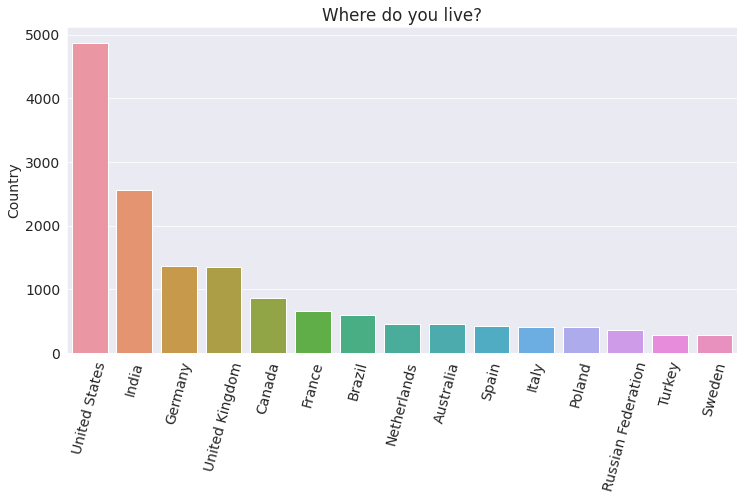

In [28]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

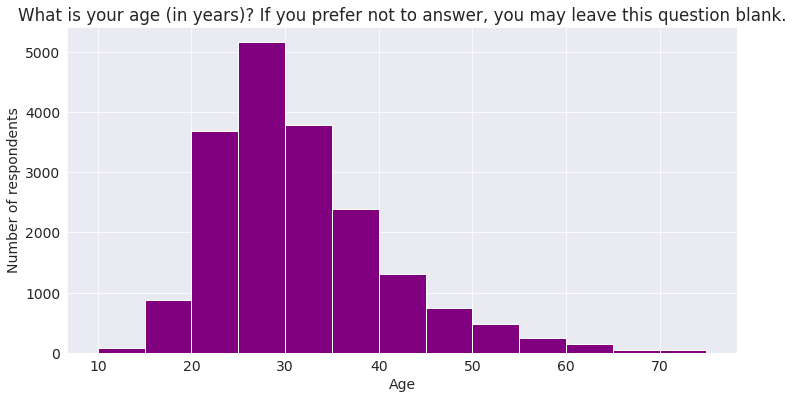

In [29]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.


### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [30]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [31]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  19477
Woman                                                 1359
Non-binary, genderqueer, or gender non-conforming      140
Name: Gender, dtype: int64

A pie chart would be a great way to visualize the distribution.

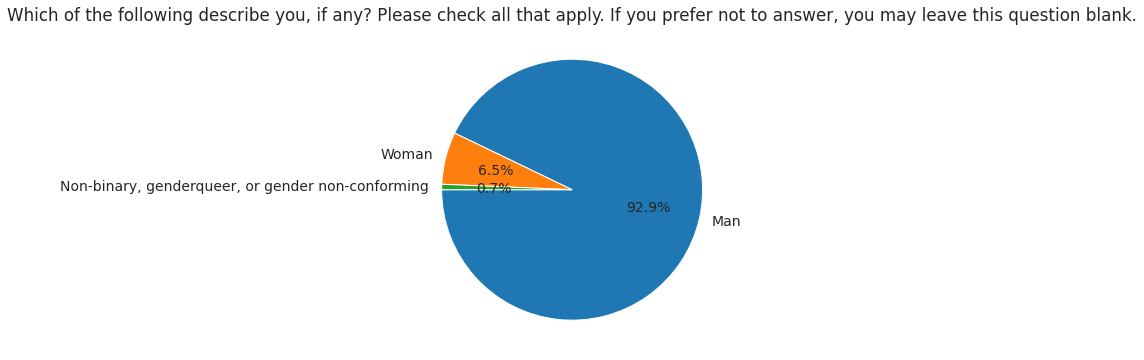

In [32]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%. 

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

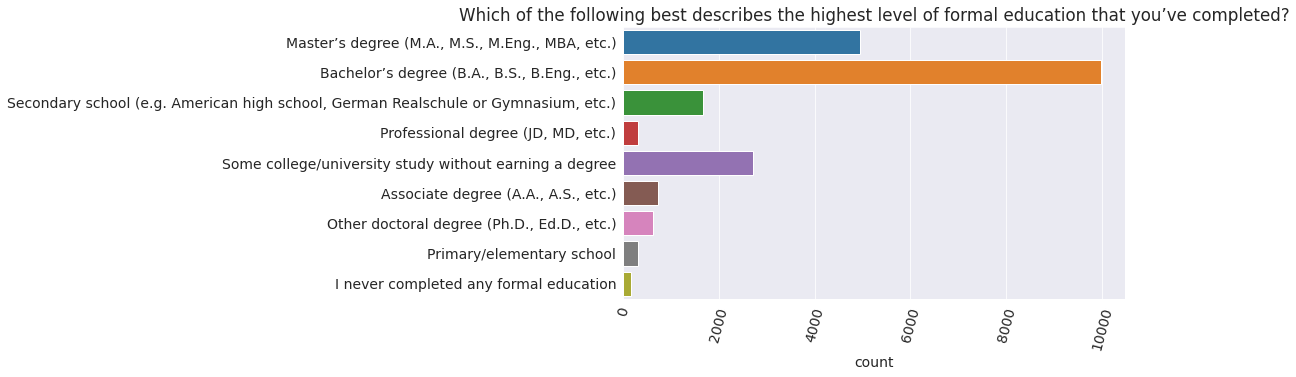

In [33]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science. 

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [36]:
schema.UndergradMajor

'What was your primary field of study?'

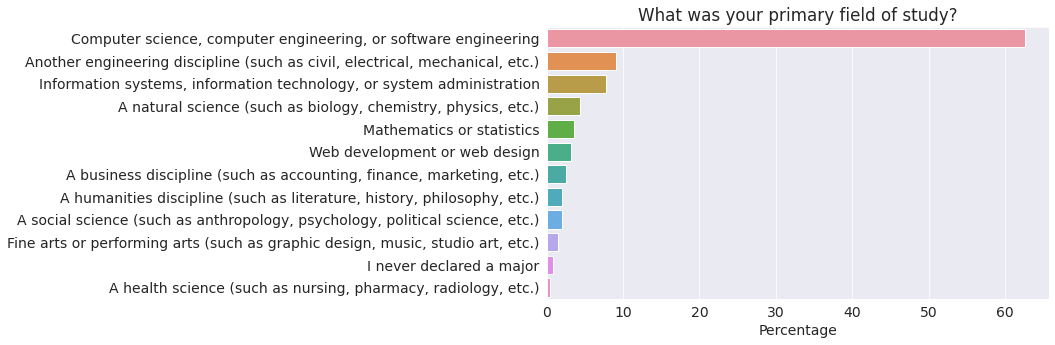

In [37]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.


### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [38]:
schema.Employment

'Which of the following best describes your current employment status?'

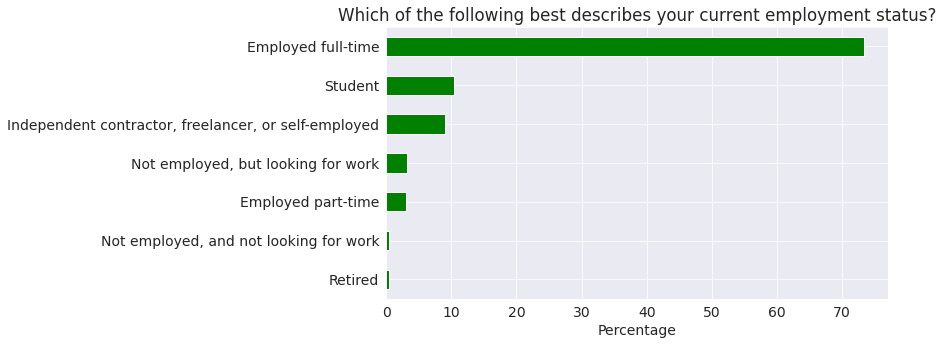

In [39]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.
 comparison between `Enthusiast` and `Professional`.

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [40]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [41]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                   1729
Developer, back-end                                                                                                                                                                                                                                                                                     1099
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                                                           886
Developer, back-end;Developer, full-stack                                                        

Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [42]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [43]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [44]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22132,True,True,False,False,True,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,False
22133,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22134,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22135,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.


In [45]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            10657
Developer, back-end                              10617
Developer, front-end                              7195
Developer, desktop or enterprise applications     4574
Developer, mobile                                 3820
DevOps specialist                                 2422
Database administrator                            2317
Designer                                          2049
System administrator                              2020
Developer, embedded applications or devices       1754
Developer, QA or test                             1555
Data or business analyst                          1497
Data scientist or machine learning specialist     1454
Engineer, data                                    1454
Academic researcher                               1327
Educator                                          1126
Developer, game or graphics                       1049
Engineering manager                               1036
Product ma

As one might expect, the most common roles include "Developer" in the name. 

## Asking and Answering Questions

Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q: What are the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [46]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
22132    Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...
22133                                                  NaN
22134                     JavaScript;Python;SQL;TypeScript
22135                                          Java;Python
22136                 Bash/Shell/PowerShell;Java;Scala;SQL
Name: LanguageWorkedWith, Length: 22086, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [47]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [48]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22132,True,True,True,False,False,True,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
22133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22134,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
22135,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.


In [49]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               67.662773
HTML/CSS                 62.143439
SQL                      54.808476
Python                   42.502037
Java                     39.477497
Bash/Shell/PowerShell    33.170334
C#                       32.296477
TypeScript               26.102508
PHP                      25.310151
C++                      21.891696
C                        19.935706
Go                        8.530291
Kotlin                    8.086571
Ruby                      6.945576
Swift                     6.320746
VBA                       6.012859
Assembly                  5.646111
R                         5.428778
Objective-C               4.437200
Dart                      3.825953
Rust                      3.585982
Scala                     3.282622
Perl                      2.807208
Haskell                   1.924296
Julia                     0.810468
dtype: float64

We can plot this information using a horizontal bar chart.

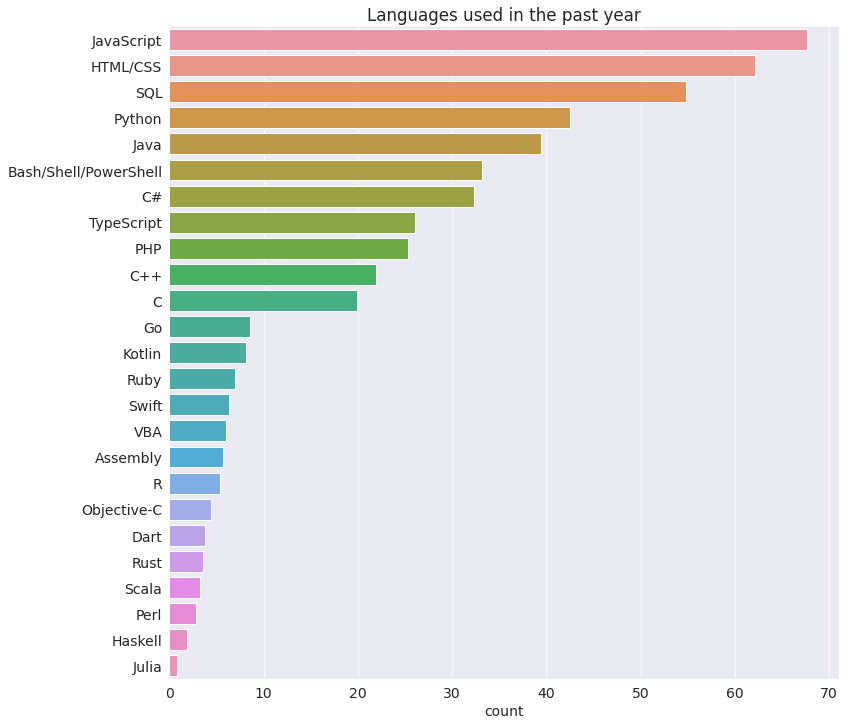

In [50]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

#### Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [53]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

JavaScript               45.499411
Python                   44.485194
HTML/CSS                 36.335235
SQL                      35.207824
TypeScript               30.064294
C#                       25.124513
Java                     22.543693
Go                       21.792085
Bash/Shell/PowerShell    20.397537
Rust                     17.200942
Kotlin                   16.232002
C++                      15.937698
PHP                      11.690664
C                         9.952006
Swift                     9.626007
Dart                      8.145431
Ruby                      6.841438
R                         6.823327
Scala                     5.478584
Haskell                   4.672643
Assembly                  3.825953
Julia                     2.730236
Objective-C               2.626098
Perl                      1.729602
VBA                       1.629992
dtype: float64

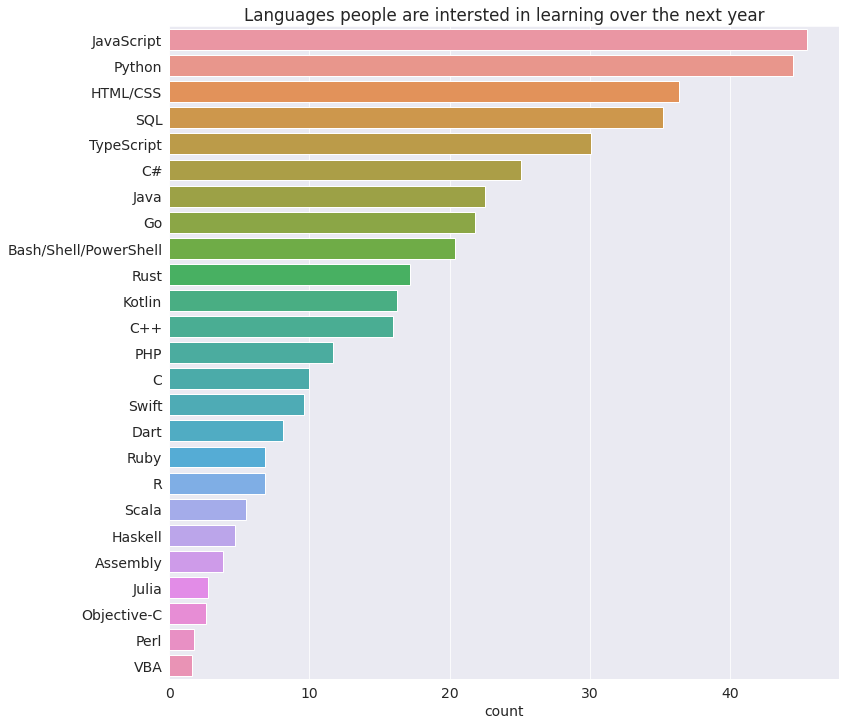

In [54]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. We're using Python for this very analysis, so we're in good company!

**Exercises**: Repeat the exercises from the previous question, replacing "most common languages" with "languages people are interested in learning/using."

#### Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

While this question may seem tricky at first, it's straightforward to solve using Pandas array operations.

In [55]:
languages_loved_df = languages_worked_df & languages_interested_df

In [56]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

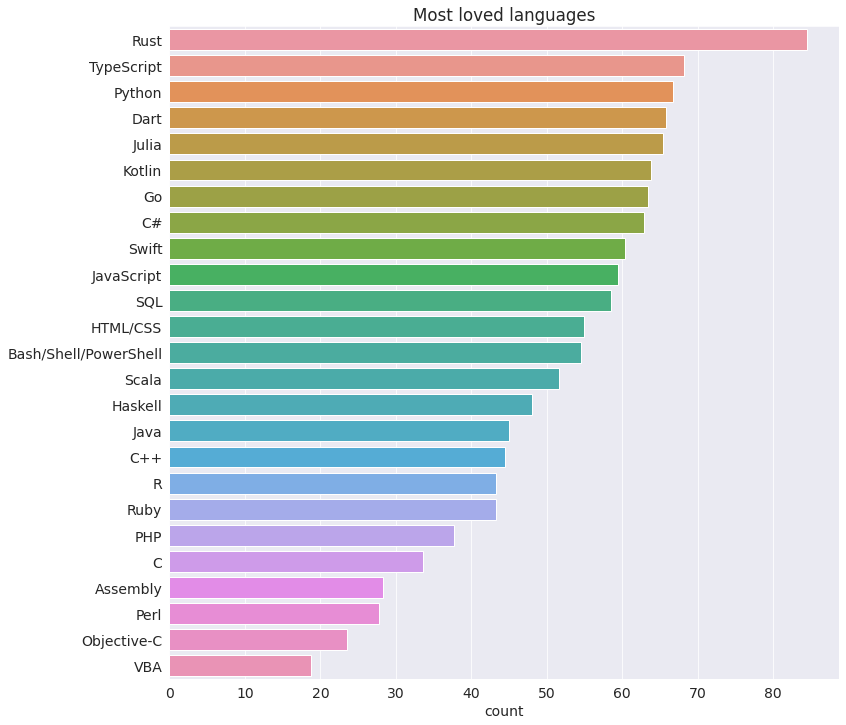

In [57]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

Rust has been StackOverflow's most-loved language for four years in a row.The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.



#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [58]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [59]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [60]:
high_response_countries_df

,WorkWeekHrs
Country,
United States,41.778359
Turkey,40.709135
Canada,40.167669
India,40.160095
Australia,40.102241
Sweden,40.027650
Poland,39.642442
Italy,39.339450
Russian Federation,39.333333


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.